# DX 601 Week 6 Homework

## Introduction

In this homework, you will continue your practice working with random variables and expanding your focus to consider multiple variables at once.

The focus on these problems is on your understanding of the math, not the programming. Some of the data sets will be small enough that you can look at the data and calculate the answer in your head. That is acceptable, though we encourage you to also think about how to write code to perform the same calculation for you. We will work with larger data sets and provide more code examples for you as this class progress.

## Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Problems

### Shared Imports

In [117]:
import math
import random

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

### Shared Data

#### Mango Data

Many of the problems will use this mango data set.
This data set is small and your code should run instantly with it, but you will be able to use the same code and techniques with larger data sets.

In [119]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

In [120]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


#### Abalone Data

A few problems will use the abalone data set too.

In [121]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")

In [122]:
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Problem 1

What is the marginal distribution of green ratings?
Set `p1` to the marginal distribution of green ratings represented as a dictionary of probabilities.
Use the integer ratings as the keys in `p1`.

In [123]:
# YOUR CHANGES HERE

p1 =dict(mango_data.groupby(['green_rating']).size()/len(mango_data))

In [124]:
p1

{1: np.float64(0.25),
 2: np.float64(0.125),
 3: np.float64(0.25),
 4: np.float64(0.125),
 5: np.float64(0.25)}

### Problem 2

Compute the marginal distribution of the mango data set's yellow rating and softness columns.
Save that probability distribution as a dictionary keyed by a tuple of yellow rating and softness values in `p2`.

In [125]:
# YOUR CHANGES HERE

p2 = dict(mango_data.groupby(['yellow_rating','softness']).size()/len(mango_data))

In [126]:
p2

{(1, 1): np.float64(0.25),
 (2, 1): np.float64(0.125),
 (3, 2): np.float64(0.25),
 (4, 3): np.float64(0.125),
 (5, 4): np.float64(0.125),
 (5, 5): np.float64(0.125)}

### Problem 3

Set `p3` to be the probability distribution of rated flavor conditioned on yellowness being rated 1.
The keys should be the integer ratings.

In [127]:
# YOUR CHANGES HERE
logIndex = mango_data['yellow_rating']==1
tmpdata =mango_data[logIndex]
p3 = dict(tmpdata.groupby(['rated_flavor']).size()/len(tmpdata))

In [128]:
p3

{1: np.float64(1.0)}

### Problem 4

Set `p4` to be the probability distribution of estimated flavor conditioned on the softness being at least 3.
The keys should be the integer estimated flavor values.

In [129]:
# YOUR CHANGES HERE
logIndex = mango_data['softness']>=3
tmpdata =mango_data[logIndex]
p4 = dict(tmpdata.groupby(['estimated_flavor']).size()/len(tmpdata))


In [130]:
p4

{3: np.float64(0.3333333333333333),
 4: np.float64(0.3333333333333333),
 5: np.float64(0.3333333333333333)}

### Problem 5

Suppose you work at Big Data Shopping Co and are given the following information by your web site analyst.
One in four hundred of the recent visitors to the shopping website added a flamingo nightstand to their shopping cart.
One in a thousand of the recent visitors bought a flamingo nightstand.
Not surprisingly, everyone who bought a flamingo nightstand had already added it to their shopping cart.

Set `p5` to the conditional probability of buying a flamingo nightstand conditioned on adding a flamingo nightstand to the shopping cart.
You should assume that all the statistics above are representative for this calculation.

In [131]:
# YOUR CHANGES HERE
p5 = (1*1/1000)/(1/400)

In [132]:
p5

0.4

### Problem 6

In the last 24 hours, 132 out of 500 visitors to bigdata.shopping's garden gnome page bought a garden gnome.
Given no other data or assumptions, set `p6` to the best estimate of the probability that a visitor to the garden gnome page will buy a garden gnome.

In [133]:
# YOUR CHANGES HERE

p6 = 132/500

In [134]:
p6

0.264

### Problem 7

Set `p7` to be the correlation between the rated yellowness and rated flavor columns in the mango data set.



In [135]:
# YOUR CHANGES HERE
corrcoef=np.corrcoef(mango_data['yellow_rating'],mango_data['rated_flavor'])
p7 = corrcoef[0,1]

In [136]:
p7

np.float64(0.629940788348712)

### Problem 8

Set `p8` to the name of the column which is most correlated with rated flavor in the mango data set.
That is, `p8` should be the name of the column with the highest correlation with rated flavor besides rated flavor itself.

In [137]:
# YOUR CHANGES HERE
corrcoef={}
for i in mango_data.columns:
    if i=='rated_flavor':
        continue
    else:
        tmpcorr=np.corrcoef(mango_data[i],mango_data['rated_flavor'])
        corrcoef[i]=tmpcorr[0,1]
print(corrcoef)
p8 = max(corrcoef, key=corrcoef.get)

{'green_rating': np.float64(-0.629940788348712), 'yellow_rating': np.float64(0.629940788348712), 'softness': np.float64(0.4695449296338763), 'wrinkles': np.float64(-0.6546536707079771), 'estimated_flavor': np.float64(0.4285714285714285), 'estimated_sweetness': np.float64(0.4472135954999579)}


In [138]:
p8

'yellow_rating'

### Problem 9

Are the whole weight and shucked weight columns of the abalone data set independent?
Set `p9` to be `True` if they are independent and `False` otherwise.

Base your determination on the scatter plot below.


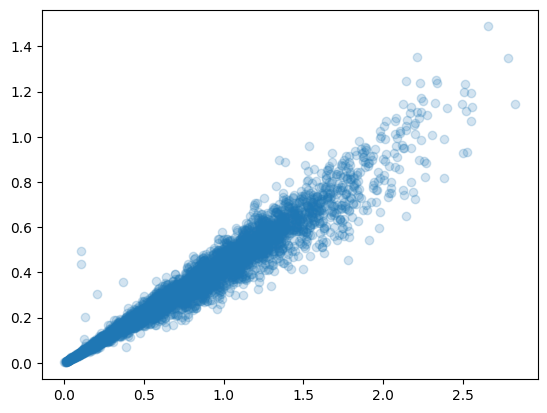

In [139]:
# DO NOT CHANGE

plt.scatter(abalone["Whole_weight"], abalone["Shucked_weight"], alpha=0.2)

In [140]:
# YOUR CHANGES HERE

p9 = False

In [141]:
p9

False

### Problem 10

Set `p10` to be `True` if the $x$ and $y$ coordinates in the chart below are independent and `False` otherwise.

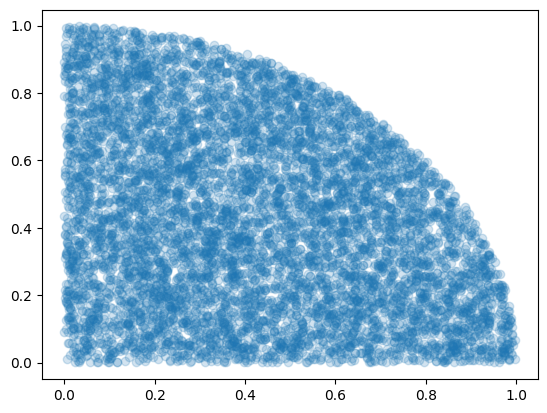

In [142]:
x10a = np.random.uniform(size=10000)
y10a = np.random.uniform(size=x10a.size)

i10 = [i for (i, (x, y)) in enumerate(zip(x10a, y10a)) if x**2 + y ** 2 <= 1]
       
x10 = x10a[i10]
y10 = y10a[i10]

plt.scatter(x10, y10, alpha=0.2)
None

In [143]:
# YOUR CHANGES HERE

p10 = True

In [144]:
p10

True

### Problem 11

Set `p11` to the covariance matrix for `x11` and `y11`.
`p11` should be a $2 \times 2$ array or comparable list with the first row and column for `x11` and the second row and column for `y11`.

In [145]:
# DO NOT CHANGE

x11 = [3.45135619, 3.30359868, 3.80301221, 3.05576091, 3.35959026,
       3.93369823, 3.56030892, 3.79079918, 3.58351627, 3.89955704,
       3.50722748, 3.81814012, 3.11891712, 3.23604022, 3.41046033,
       3.61879663, 3.47733679, 3.47219379, 3.26335395, 3.94815672,
       3.05499943, 3.31165065, 3.14194717, 3.85874993, 3.43944239,
       3.93880704, 3.78149361, 3.85319621, 3.93251236, 3.1244458 ,
       3.51479675, 3.31065647, 3.68922161, 3.69453609, 3.99817691,
       3.78797417, 3.61678566, 3.14469358, 3.41114671, 3.06903794,
       3.33712988, 3.96222151, 3.8151214 , 3.6291897 , 3.14286665,
       3.43086176, 3.17191446, 3.40047667, 3.61731853, 3.36008659,
       3.49071748, 3.51121044, 3.62548735, 3.97730327, 3.13992702,
       3.32208527, 3.58140311, 3.29690303, 3.20326751, 3.58290725,
       3.10759188, 3.0529344 , 3.35643465, 3.92696211, 3.60750114,
       3.90811756, 3.66407104, 3.07349926, 3.72687355, 3.94626354,
       3.9910842 , 3.53947948, 3.6408745 , 3.8486967 , 3.00029992,
       3.87798094, 3.00201273, 3.06248824, 3.79740457, 3.75539568,
       3.10317852, 3.07839287, 3.45268881, 3.65475305, 3.0676645 ,
       3.80307742, 3.85776697, 3.74214255, 3.87684372, 3.30847049,
       3.06396169, 3.61068014, 3.15080616, 3.54575297, 3.34265319,
       3.84526746, 3.81736296, 3.89075515, 3.45335972, 3.55364463]

In [146]:
# DO NOT CHANGE

y11 = [ 9.52308027,  9.07980775, 10.57804833,  8.33629443,  9.24778248,
       10.97010639,  9.84993847, 10.54140923,  9.9195605 , 10.86768282,
        9.69069413, 10.62343205,  8.52576306,  8.87713237,  9.40039269,
       10.02540158,  9.60102207,  9.58559305,  8.95907353, 11.01348187,
        8.33400998,  9.10396364,  8.59485321, 10.74526148,  9.48733888,
       10.98543281, 10.51349254, 10.72860033, 10.96654878,  8.5423491 ,
        9.71340195,  9.10098111, 10.23667653, 10.25261998, 11.16354243,
       10.53293421, 10.01936868,  8.60309245,  9.40245182,  8.37612552,
        9.18040135, 11.05567622, 10.6143759 , 10.05658081,  8.59761165,
        9.46159698,  8.68475508,  9.37044171, 10.02096729,  9.24927146,
        9.64116415,  9.70264301, 10.04547374, 11.1009215 ,  8.58879276,
        9.1352675 ,  9.91322104,  9.05972079,  8.77881422,  9.91773345,
        8.49178735,  8.32781491,  9.23831565, 10.94989801,  9.99151513,
       10.89336439, 10.16122481,  8.38950948, 10.34963234, 11.00780233,
       11.1422643 ,  9.78745015, 10.09163519, 10.71510178,  8.16991145,
       10.80295453,  8.1750499 ,  8.35647643, 10.56122542, 10.43519874,
        8.47854725,  8.40419031,  9.52707813, 10.13327086,  8.37200519,
       10.57824395, 10.74231262, 10.39543934, 10.79954286,  9.09442317,
        8.36089677, 10.00105211,  8.62143019,  9.80627061,  9.19697126,
       10.70481407, 10.62110057, 10.84127715,  9.52909086,  9.8299456 ]

In [147]:
# YOUR CHANGES HERE

p11 = np.cov(x11,y11)

In [148]:
p11

array([[0.0891753 , 0.26752591],
       [0.26752591, 0.80257772]])

### Problem 12

Set `p12` to the Pearson correlation coefficient of `x12` and `y12`.
`p12` should be a single number.

In [149]:
# DO NOT CHANGE

x12 = [-2.91506986,  2.4369173 ,  1.95599664,  2.95052172,  1.57172146,
       -2.69617796, -0.57004013, -2.38431119,  2.81499733,  2.36040737,
       -1.88615599,  2.20839037,  2.84780467, -0.38441269,  0.37903161,
       -1.32846574,  2.83433648,  3.47947224,  2.47839045,  0.97819286,
       -0.98231451,  2.52159622,  3.55418221,  1.16098093, -0.90595327,
        1.42144648, -2.82560611, -0.38950829, -0.42510526, -1.17864301,
        2.89650282, -1.94533532, -0.34752021,  3.59037634, -1.89225398,
        2.92597104,  2.36110456,  0.49836093, -2.47595   ,  3.69327894,
        0.32182152,  1.66297472,  1.2216482 ,  1.09225112, -0.58822119,
        0.06469419,  0.12561507,  1.25396746,  0.45719347, -0.58770038,
        3.33165298,  0.54996139, -2.15161759,  2.87857705,  3.88066786,
       -2.2969584 , -1.0433141 , -1.91700636, -0.96606184,  1.47657963,
        0.41398809,  1.91887443,  2.8595397 ,  1.79240611,  1.2716482 ,
        3.019548  , -1.79358378,  2.45557719,  1.07625993, -1.19877437,
       -0.85417661,  2.28901314,  1.99013355,  0.19455197, -1.70340119,
        2.04949576, -0.73452472,  3.79394578, -1.33681017, -1.69285713,
       -1.09488167,  0.09516032,  3.28976286,  0.09890515,  3.04869108,
        2.71824262,  1.33703119,  1.10887475,  2.41646694, -2.59743874,
       -1.88581193,  2.45257687,  0.45014817,  1.3551674 ,  0.45466688,
        2.22815127, -1.63962405,  0.71262641,  1.57814179, -0.87506036]

In [150]:
# DO NOT CHANGE

y12 = [-3.62136104,  3.01354918,  0.59259613,  1.26662246,  2.83774649,
       -1.35137909,  1.33513713, -0.53735492,  4.03892323,  1.3209898 ,
       -3.82294367,  3.94269009,  2.43955259, -1.05945146,  0.9462566 ,
       -2.2829637 ,  1.31812779,  1.54014681,  3.25593623,  2.20225728,
       -1.69075821,  2.44057529,  4.10961481, -0.74944241, -2.20164569,
        3.08381835, -2.36200571, -2.26095247, -0.2076718 , -2.55422417,
        4.70777453, -0.74357913, -0.41282737,  4.92947842, -3.77328693,
        1.00351866,  0.83136727, -0.7447911 , -4.38005256,  3.01850649,
       -0.85726851, -0.02974665,  2.56200295,  0.87407479, -0.45513678,
       -0.19204408, -0.70899064,  3.17028081,  1.87739584, -0.99310834,
        2.51451823,  0.59064547, -0.27711393,  2.43869616,  2.53649148,
       -3.24708835, -0.50652785, -0.53188376, -1.46503737,  0.99217475,
        0.65902263,  2.8911828 ,  2.31470242,  3.20227862,  1.21931988,
        2.52646379, -1.64352734,  3.70722116, -0.55695142, -1.8817341 ,
       -0.83730948,  2.87349221,  0.21400964,  2.01714879,  0.0751672 ,
        2.11068784, -0.34094097,  5.72579119, -2.80712103, -1.73365343,
       -2.25287371, -1.65139632,  3.02286331, -1.04334269,  3.91376557,
        2.94859819,  2.53726986,  0.28805016,  1.76029973, -1.99723417,
       -1.46763362,  3.80846982, -0.58780512,  2.3922342 , -1.18348973,
        3.58798976, -3.27026166,  2.509013  , -0.20161348, -0.86510388]

In [151]:
# YOUR CHANGES HERE
tmpcorr=np.corrcoef(x12,y12)
p12 = tmpcorr[0,1]

In [152]:
p12

np.float64(0.8469529816236201)

### Problem 13

Set `p13` to the correlation matrix of the columns of `q13`.

In [153]:
# DO NOT CHANGE

q13 = pd.DataFrame({"a": [0, 1, 1, 1, 0, 0, 1, 0, 1, 0], "b": [0, 0, 0, 1, 0, 0, 1, 0, 0, 1]})
q13

,a,b
0,0,0
1,1,0
2,1,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,0,1


In [154]:
# YOUR CHANGES HERE

p13 = np.corrcoef(q13['a'],q13['b'])

In [155]:
p13

array([[1.        , 0.21821789],
       [0.21821789, 1.        ]])

### Problem 14

Set `p14` to the median value of column `x` according to the data set in `q14`.

In [156]:
# DO NOT CHANGE

q14 = pd.DataFrame({"x": [0, 0, 0, 0, 1, 1, 1, 1],
                    "y": [0, 0, 1, 1, 0, 0, 1, 1],
                     "z": [0, 1, 0, 1, 0, 1, 0, 1], 
                     "probability": [0.1, 0.05, 0.04, 0.20, 0.10, 0.02, 0.2, 0.29]})
q14

,x,y,z,probability
0,0,0,0,0.10
1,0,0,1,0.05
2,0,1,0,0.04
3,0,1,1,0.20
4,1,0,0,0.10
5,1,0,1,0.02
6,1,1,0,0.20
7,1,1,1,0.29


Hint: Make sure to consider the probability column in your answer.

In [157]:
# YOUR CHANGES HERE
p14 = 1

In [158]:
p14

1

### Problem 15

Suppose $X$ is a random variable between -5 and 5.
Additionally, assume that $Y$ is a random variable uniformly distributed between $-\sqrt{25 - X^2}$ and $\sqrt{25 - X^2}$.
Together, $X$ and $Y$ fill a circle centered on the origin of radius 5.

Set `p15` to the Pearson correlation of $X$ and $Y$.

Hint: you can figure this by reasoning about the relationship between $X$ and $Y$.

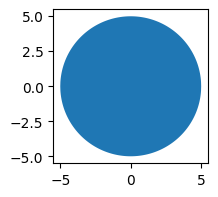

In [159]:
plt.figure(figsize=(2,2))

x15 = np.linspace(-5, 5, 1000)
plt.fill_between(x15, -np.sqrt(25 - x15 * x15), np.sqrt(25 - x15 * x15))
None

In [160]:
# YOUR CHANGES HERE

p15 = 0

In [161]:
p15

0

### Problem 16

Build a linear regression with the abalone data predicting the rings column.
Set `p16` to be a list of the columns with positive coefficients in the linear regression.

In [162]:
# DO NOT CHANGE

abalone_inputs = abalone.drop(["Sex", "Rings"], axis=1)
abalone_inputs

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [163]:
# DO NOT CHANGE

abalone_target = abalone["Rings"]
abalone_target

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [164]:
# YOUR CHANGES HERE
model=sklearn.linear_model.LinearRegression()
model.fit(abalone_inputs,abalone_target)
p16 = abalone_inputs.iloc[:,model.coef_>0].columns.to_list()

In [165]:
p16

['Diameter', 'Height', 'Whole_weight', 'Shell_weight']

### Problem 17

Compute the correlations between the numeric columns of the abalone data set.
Set `p17` to be a list of the numeric input (neither Sex nor Rings) columns that are positively correlated with the rings column.

In [166]:
# YOUR CHANGES HERE
corrcoef={}
for i in abalone_inputs.columns:
        tmpcorr=np.corrcoef(abalone_inputs[i],abalone_target)
        corrcoef[i]=tmpcorr[0,1]
p17 = abalone_inputs.iloc[:,np.asarray(list(corrcoef.values()))>0].columns.to_list()

In [167]:
p17

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

### Problem 18

Read the following code setting and plotting the variables `xs9` and `ys9`.
Set `p18` to `True` if `xs9` and `ys9` are independent and `False` otherwise.

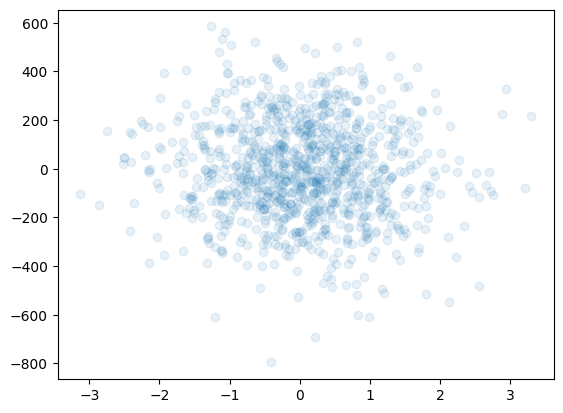

In [168]:
# DO NOT CHANGE

xs9 = np.random.normal(scale=1.0, size=1000)
ys9 = xs9 * 2 + np.random.normal(scale=200.0, size=xs9.shape)

plt.scatter(xs9, ys9, alpha=0.1)
None

In [169]:
# YOUR CHANGES HERE

p18 = True

In [170]:
p18

True

### Problem 19

Set `p19` to the average value of column `a` according to the data set in `q19`.

In [171]:
# DO NOT CHANGE

q19 = pd.DataFrame({"a": [0, 0, 1, 1], "b": [0, 1, 0, 1], "probability": [0.3, 0.25, 0.10, 0.35]})
q19

,a,b,probability
0,0,0,0.30
1,0,1,0.25
2,1,0,0.10
3,1,1,0.35


Hint: make sure to consider the probability column in your answer.

In [172]:
# YOUR CHANGES HERE
pmf=[q19['a'][i]*q19['probability'][i] for i in range(len(q19))]
p19 = sum(pmf)

In [173]:
p19

np.float64(0.44999999999999996)

### Problem 20

Set `p20` to be the average $L_2$ loss using `f20` to predict `y20` from `x20`.

In [174]:
# DO NOT CHANGE

x20 = np.array([-0.52709912, -0.49174622,  0.82866436,  0.8217821 ,  0.3958331 ,
       -0.87936203,  0.55333159,  0.30045474, -0.08038466, -0.71284041,
       -0.68142469, -0.28651874,  0.90145789, -0.16948594,  0.58256802,
       -0.4919045 , -0.00742751, -0.21247089, -0.77135299,  0.66969024,
        0.35329456,  0.85175542,  0.12408819,  0.86938528,  0.95160858,
        0.12594415,  0.31743633,  0.51340341, -0.8166252 , -0.49398853,
        0.92503036, -0.14074539,  0.46231389,  0.92122755, -0.11715912,
        0.96177006,  0.02910419,  0.50516748,  0.89121846,  0.72630979,
       -0.31267924, -0.31578969, -0.92795899, -0.5052521 , -0.2201963 ,
       -0.91495317,  0.39874951, -0.03522254, -0.01666227, -0.72403231,
       -0.93057515, -0.70834874, -0.81217405,  0.91454526, -0.305444  ,
        0.73411844,  0.62602511,  0.34952866,  0.3375004 , -0.61805719,
        0.11652068,  0.44797788,  0.20932479,  0.11271963,  0.15622378,
       -0.4182759 ,  0.93799812,  0.40374314,  0.93834405,  0.7549425 ,
        0.07223779, -0.43460579,  0.25434465,  0.65296775,  0.6405034 ,
       -0.15420097,  0.86634111,  0.77441435, -0.14974688,  0.37189752,
        0.41132465, -0.28029963,  0.05296516,  0.39283028, -0.31468963,
       -0.24875692,  0.91446888, -0.05691058,  0.92895291, -0.9706018 ,
        0.85731386, -0.5833158 , -0.53153802, -0.62148641, -0.7015159 ,
        0.73871662, -0.25388259, -0.54981557,  0.43285609, -0.98278776])
y20 = np.sqrt(1 - x20 * x20)

In [175]:
# DO NOT CHANGE

def f20(x):
    return 1 - x * x

In [176]:
# YOUR CHANGES HERE
y_predict=f20(x20)
p20 = np.mean((y_predict-y20)**2)

In [177]:
p20

np.float64(0.023741518816855947)

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE